### PROBLEM DESCRIPTION:

#### The banks that are receiving customer complaints filed against them will analyse the complaint data to provide results on where the most complaints are being filed, what products/ services are producing the most complaints and other useful data. These datasets fall under the complaints of Credit reporting, Mortgage, Debt Collection, Consumer Loan and Banking Accounting.

Reference & Dataset:
https://www.kaggle.com/selener/consumer-complaint-database

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set()

# Plotly libraries
import plotly
import plotly.express as px
import plotly.graph_objs as go
import chart_studio.plotly as py
import os
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode, plot
cf.go_offline()

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from kmodes.kmodes import KModes
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [3]:
customer_data = pd.read_csv('Consumer_Complaints.csv')
customer_data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,07/29/2013,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,NaN,NaN,Wells Fargo & Company,VA,24540,NaN,NaN,Phone,07/30/2013,Closed with explanation,Yes,No,468882
1,07/29/2013,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,Wells Fargo & Company,CA,95992,Older American,NaN,Web,07/31/2013,Closed with explanation,Yes,No,468889
2,07/29/2013,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,Santander Bank US,NY,10065,NaN,NaN,Fax,07/31/2013,Closed,Yes,No,468879
3,07/29/2013,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,GA,30084,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,468949
4,07/29/2013,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Franklin Credit Management,CT,06106,NaN,NaN,Web,07/30/2013,Closed with explanation,Yes,No,475823


In [4]:
customer_data.columns = customer_data.columns.str.title()

In [5]:
customer_data[['Issue','Sub-Issue','Product','Sub-Product','Company','State',
               'Company Public Response','Consumer Consent Provided?','Date Received','Consumer Complaint Narrative',
               'Company Response To Consumer','Submitted Via']].describe().transpose()

,count,unique,top,freq
Issue,670598,95,"Loan modification,collection,foreclosure",106455
Sub-Issue,269868,68,Account status,32633
Product,670598,12,Mortgage,210324
Sub-Product,472396,47,Other mortgage,81715
Company,670598,3933,Bank of America,61720
State,665293,62,CA,97640
Company Public Response,145197,10,Company has responded to the consumer and the ...,57364
Consumer Consent Provided?,208151,4,Consent provided,114704
Date Received,670598,1818,08/27/2015,963
Consumer Complaint Narrative,114704,112690,I am filing this complaint because Experian ha...,102


### What are the top 15 issues and sub-issues and companies?

In [ ]:
sns.set(style='white')
customer_data['Issue'].str.strip("'").value_counts()[0:15].iplot(kind='bar',title='Top 15 issues',fontsize=14,color='orange')

In [ ]:
customer_data['Sub-Issue'].str.strip("'").value_counts()[0:15].iplot(
    kind ='bar',title='Top 15 Sub Issues',fontsize=14,color='#9370DB')

In [ ]:
customer_data['Company'].str.strip("'").value_counts()[0:15].iplot(
    kind='bar',title='Top 15 Company',fontsize=14,color='purple')

### What is the most common response received from companies?

In [ ]:
grouped = customer_data.groupby(['Company Response To Consumer']).size()
pie_chart = go.Pie(labels=grouped.index,values=grouped,
                  title='Company Response to the Customer')
iplot([pie_chart])

### Which state received the largest number of complaints?

In [ ]:
states = customer_data['State'].value_counts()

scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = states.index,
    z = states.values,
    locationmode = 'USA-states',
    text = states.index,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(244,244,244)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Complaints")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Complaints by State'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(100,149,237)'),
)

fig = go.Figure(data = data, layout = layout)
iplot(fig)

# Preprocessing of the data

### Removing unwanted features (checking % of missing values in data)

In [11]:
# getting the sum of null values and ordering.
total = customer_data.isnull().sum().sort_values(ascending = False)  

#getting the percent and order of null.
percent = (customer_data.isnull().sum()/customer_data.isnull().count()*100).sort_values(ascending =False)

# Concatenating the total and percent
df = pd.concat([total , percent],axis =1,keys=['Total' ,'Percent'])

# Returning values of nulls different of 0
(df[~(df['Total'] == 0)])

,Total,Percent
Tags,575868,85.873802
Consumer Complaint Narrative,555894,82.895267
Company Public Response,525401,78.348131
Consumer Consent Provided?,462447,68.960391
Sub-Issue,400730,59.757112
Sub-Product,198202,29.556008
Consumer Disputed?,41419,6.176428
Zip Code,5324,0.793918
State,5305,0.791085


##### Based on above % rate , implementing the below cleanup activity - 
1. Remove Records from ZIP code since Location information can be retrieved from State features
3. Remove Sub-issue, Consumer complaint narrative, Company public response, Tags, Consumer consent provided? as the missing % is high and their relation with Product is low

### Analyzing missing values and eradicating missing value features

In [12]:
train_complain = customer_data.drop(['Sub-Issue','Consumer Complaint Narrative','Date Received','Date Sent To Company',
                                 'Company Public Response','Zip Code','Tags','Consumer Consent Provided?'], axis=1)

In [13]:
train_complain.head(2)

,Product,Sub-Product,Issue,Company,State,Submitted Via,Company Response To Consumer,Timely Response?,Consumer Disputed?,Complaint Id
0,Consumer Loan,Vehicle loan,Managing the loan or lease,Wells Fargo & Company,VA,Phone,Closed with explanation,Yes,No,468882
1,Bank account or service,Checking account,Using a debit or ATM card,Wells Fargo & Company,CA,Web,Closed with explanation,Yes,No,468889


In [14]:
train_complain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670598 entries, 0 to 670597
Data columns (total 10 columns):
Product                         670598 non-null object
Sub-Product                     472396 non-null object
Issue                           670598 non-null object
Company                         670598 non-null object
State                           665293 non-null object
Submitted Via                   670598 non-null object
Company Response To Consumer    670598 non-null object
Timely Response?                670598 non-null object
Consumer Disputed?              629179 non-null object
Complaint Id                    670598 non-null int64
dtypes: int64(1), object(9)
memory usage: 51.2+ MB


In [15]:
train_complain[['Product','Sub-Product','Issue','Company','State',
               'Company Response To Consumer','Submitted Via','Timely Response?','Consumer Disputed?']].describe().transpose()

,count,unique,top,freq
Product,670598,12,Mortgage,210324
Sub-Product,472396,47,Other mortgage,81715
Issue,670598,95,"Loan modification,collection,foreclosure",106455
Company,670598,3933,Bank of America,61720
State,665293,62,CA,97640
Company Response To Consumer,670598,8,Closed with explanation,493981
Submitted Via,670598,6,Web,446035
Timely Response?,670598,2,Yes,652848
Consumer Disputed?,629179,2,No,496466


In [16]:
train = train_complain.dropna()

#### Finally we select below features which has complete data to support our analysis

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441034 entries, 0 to 670597
Data columns (total 10 columns):
Product                         441034 non-null object
Sub-Product                     441034 non-null object
Issue                           441034 non-null object
Company                         441034 non-null object
State                           441034 non-null object
Submitted Via                   441034 non-null object
Company Response To Consumer    441034 non-null object
Timely Response?                441034 non-null object
Consumer Disputed?              441034 non-null object
Complaint Id                    441034 non-null int64
dtypes: int64(1), object(9)
memory usage: 37.0+ MB


### using Label-Encoder to convert data into numerical

In [18]:
from collections import defaultdict 

In [19]:
labelencoder = LabelEncoder()

In [20]:
encoder_dict = defaultdict(LabelEncoder)
labeled_df = train.apply(lambda x: encoder_dict[x.name].fit_transform(x))
# train_enc = train.apply(labelencoder.fit_transform)
labeled_df.head(2)

,Product,Sub-Product,Issue,Company,State,Submitted Via,Company Response To Consumer,Timely Response?,Consumer Disputed?,Complaint Id
0,1,46,38,3429,55,2,1,1,0,98369
1,0,4,57,3429,8,5,1,1,0,98371


In [21]:
labeled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441034 entries, 0 to 670597
Data columns (total 10 columns):
Product                         441034 non-null int32
Sub-Product                     441034 non-null int32
Issue                           441034 non-null int32
Company                         441034 non-null int32
State                           441034 non-null int32
Submitted Via                   441034 non-null int32
Company Response To Consumer    441034 non-null int32
Timely Response?                441034 non-null int32
Consumer Disputed?              441034 non-null int32
Complaint Id                    441034 non-null int64
dtypes: int32(9), int64(1)
memory usage: 21.9 MB


In [22]:
X = labeled_df.drop(['Product'], 1)  #independent columns
y = labeled_df['Product']

### Apply SelectKBest to analyze top best features related to Product using Chi square Test

In [23]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  # print 10 best features

                          Specs         Score
8                  Complaint Id  2.693673e+09
2                       Company  3.553747e+06
1                         Issue  9.492345e+05
0                   Sub-Product  8.832302e+05
3                         State  2.446436e+04
4                 Submitted Via  3.654981e+03
5  Company Response To Consumer  1.582233e+03
7            Consumer Disputed?  1.010760e+03
6              Timely Response?  1.013163e+02


In [24]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X_scaled,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  # naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  # print 10 best features

                          Specs         Score
0                   Sub-Product  19200.657249
1                         Issue  16366.112319
8                  Complaint Id   6107.644121
2                       Company   1011.023404
7            Consumer Disputed?   1010.759791
4                 Submitted Via    730.996272
3                         State    401.055099
5  Company Response To Consumer    263.705473
6              Timely Response?    101.316267


### Top best features selected for clustering using the Feature selection method above

In [26]:
train_enc = labeled_df.drop(['Submitted Via','Consumer Disputed?','Company Response To Consumer','Timely Response?'], axis=1)

In [27]:
train_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441034 entries, 0 to 670597
Data columns (total 6 columns):
Product         441034 non-null int32
Sub-Product     441034 non-null int32
Issue           441034 non-null int32
Company         441034 non-null int32
State           441034 non-null int32
Complaint Id    441034 non-null int64
dtypes: int32(5), int64(1)
memory usage: 15.1 MB


## First approach: using the PCA components of the dataset for K-Means clustering

### scaling using Standard scalar for PCA

In [32]:
scalar = StandardScaler()
train_std = scalar.fit_transform(train_enc)

In [33]:
pca = PCA()
pca.fit(train_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [34]:
pca.explained_variance_ratio_

array([0.22122001, 0.17620574, 0.16896093, 0.16298049, 0.13989322,
       0.13073961])

Text(0, 0.5, 'Cumulative Explained Variance')

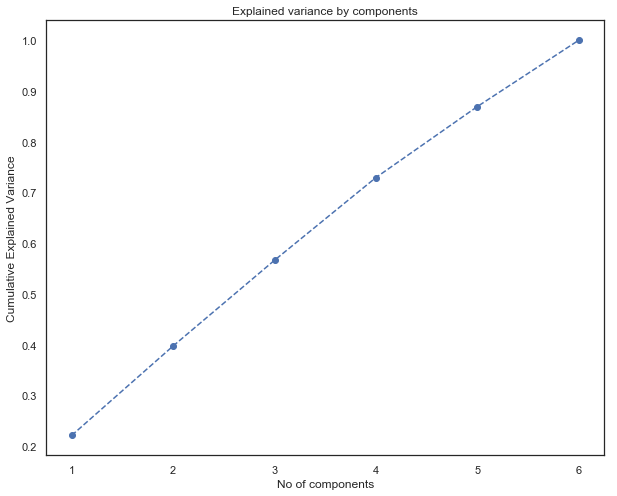

In [35]:
plt.figure(figsize=(10,8))
plt.plot(range(1,7), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained variance by components')
plt.xlabel('No of components')
plt.ylabel('Cumulative Explained Variance')

#### The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 5 components.

In [36]:
pca = PCA(n_components=5)
pca.fit(train_std)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [38]:
scores_pca = pca.transform(train_std)

### RUN K-MEANS on PCA Components

In [39]:
cost = []
for num_clusters in list(range(2,11)):
    kmeans = KMeans(n_clusters=num_clusters, init="k-means++", verbose=0)
    cluster_labels = kmeans.fit_predict(scores_pca)
    cost.append(kmeans.inertia_)
    print(f"=============================== Cluster of {num_clusters} ====================================")

=============================== Cluster of 2====================================
=============================== Cluster of 3====================================
=============================== Cluster of 4====================================
=============================== Cluster of 5====================================
=============================== Cluster of 6====================================
=============================== Cluster of 7====================================
=============================== Cluster of 8====================================
=============================== Cluster of 9====================================
=============================== Cluster of 10====================================


Text(0, 0.5, 'K-Means cost')

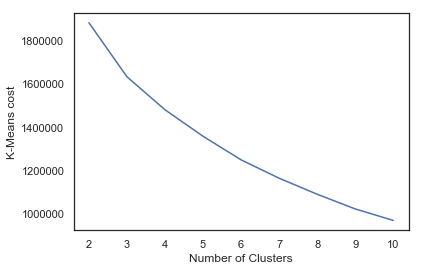

In [40]:
y_bar = np.array([i for i in range(2,11,1)])
plt.plot(y_bar, cost)
plt.xlabel("Number of Clusters")
plt.ylabel("K-Means cost")
# K-Means

### Since k->3 from graph, run K-Means with n_clusters=3 

In [41]:
kmeans_pca = KMeans(n_clusters=3, init="k-means++", verbose=0)
kmeans_pca.fit_predict(scores_pca)

array([0, 1, 2, ..., 2, 1, 2])

In [38]:
customer_df = labeled_df.apply(lambda x: encoder_dict[x.name].inverse_transform(x))

In [39]:
customer_df_pca_kmeans = pd.concat([customer_df.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
customer_df_pca_kmeans.columns.values[-5: ] = ['Component1','Component2','Component3','Component4','Component5']
customer_df_pca_kmeans['PCA_KMeans_Clusters'] = kmeans_pca.labels_

In [40]:
customer_df_pca_kmeans.head()

,Product,Sub-Product,Issue,Company,State,Submitted Via,Company Response To Consumer,Timely Response?,Consumer Disputed?,Complaint Id,Component1,Component2,Component3,Component4,Component5,PCA_KMeans_Clusters
0,Consumer Loan,Vehicle loan,Managing the loan or lease,Wells Fargo & Company,VA,Phone,Closed with explanation,Yes,No,468882,0.875052,1.121587,-1.318469,1.175532,2.363750,1
1,Bank account or service,Checking account,Using a debit or ATM card,Wells Fargo & Company,CA,Web,Closed with explanation,Yes,No,468889,0.485245,-2.472715,-1.312102,-0.024726,0.333493,0
2,Bank account or service,Checking account,"Account opening, closing, or management",Santander Bank US,NY,Fax,Closed,Yes,No,468879,-2.180751,-1.116348,-0.449963,1.275786,1.104330,2
3,Bank account or service,Checking account,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,No,468949,-1.295529,-2.070041,-0.935181,0.044956,1.003569,2
4,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",Franklin Credit Management,CT,Web,Closed with explanation,Yes,No,475823,0.734642,-1.620113,0.639424,-0.191514,-0.568477,0


In [41]:
customer_df_pca_kmeans['Cluster'] = customer_df_pca_kmeans['PCA_KMeans_Clusters'].map({0:'first',1:'second',2:'third'})

### visualize the segments with respect to the first two components

In [60]:
x_axis = customer_df_pca_kmeans['Component1']
y_axis = customer_df_pca_kmeans['Component2']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=customer_df_pca_kmeans['Cluster'], palette=['g','r','y'])
plt.title('Clusters by PCA components [1 and 2]')
plt.show()

NameError: name 'customer_df_pca_kmeans' is not defined

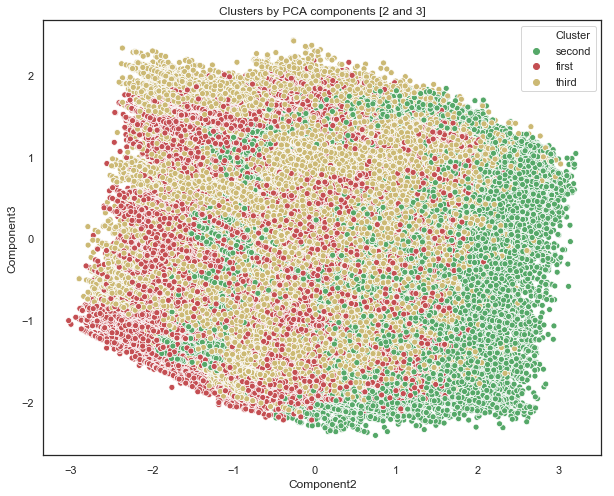

In [43]:
x_axis = customer_df_pca_kmeans['Component2']
y_axis = customer_df_pca_kmeans['Component3']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=customer_df_pca_kmeans['Cluster'], palette=['g','r','y'])
plt.title('Clusters by PCA components [2 and 3]')
plt.show()

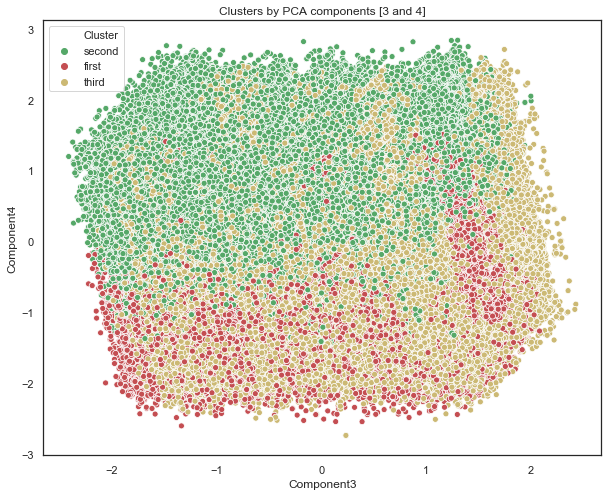

In [44]:
x_axis = customer_df_pca_kmeans['Component3']
y_axis = customer_df_pca_kmeans['Component4']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=customer_df_pca_kmeans['Cluster'], palette=['g','r','y'])
plt.title('Clusters by PCA components [3 and 4]')
plt.show()

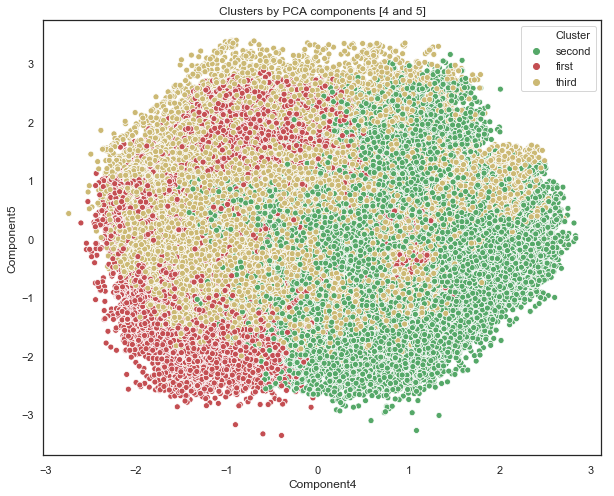

In [45]:
x_axis = customer_df_pca_kmeans['Component4']
y_axis = customer_df_pca_kmeans['Component5']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=customer_df_pca_kmeans['Cluster'], palette=['g','r','y'])
plt.title('Clusters by PCA components [4 and 5]')
plt.show()

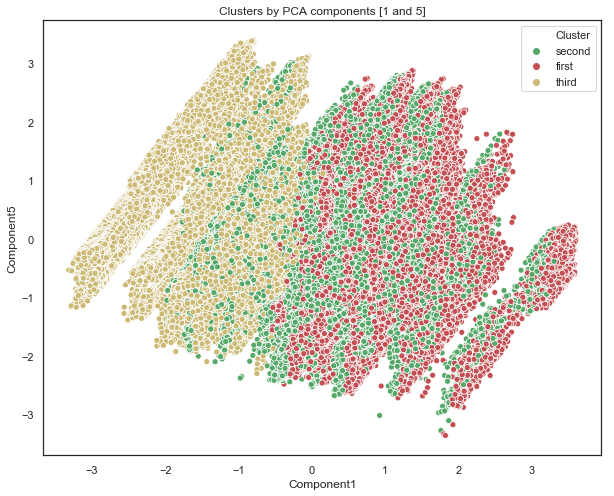

In [46]:
x_axis = customer_df_pca_kmeans['Component1']
y_axis = customer_df_pca_kmeans['Component5']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis, y_axis, hue=customer_df_pca_kmeans['Cluster'], palette=['g','r','y'])
plt.title('Clusters by PCA components [1 and 5]')
plt.show()

In [59]:
# Checking the count per cluster
cluster_pca_df = pd.DataFrame(customer_df_pca_kmeans['Cluster'].value_counts())
sns.barplot(x=cluster_pca_df.index, y=customer_df_pca_kmeans['Cluster'])

NameError: name 'customer_df_pca_kmeans' is not defined

### Top 10 Products segregated per cluster

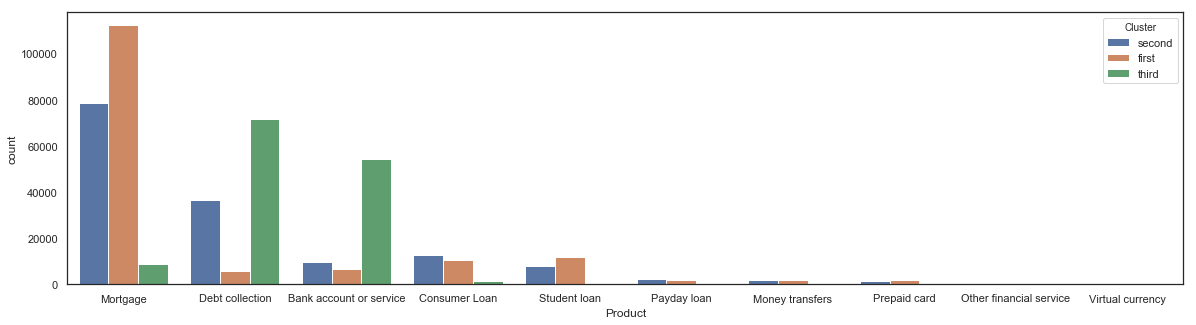

In [47]:
plt.subplots(figsize = (20,5))
sns.countplot(x=customer_df_pca_kmeans['Product'],order=customer_df_pca_kmeans['Product'].value_counts().index,hue=customer_df_pca_kmeans['Cluster'])
plt.show()

### Top 5 Issues segregated per cluster

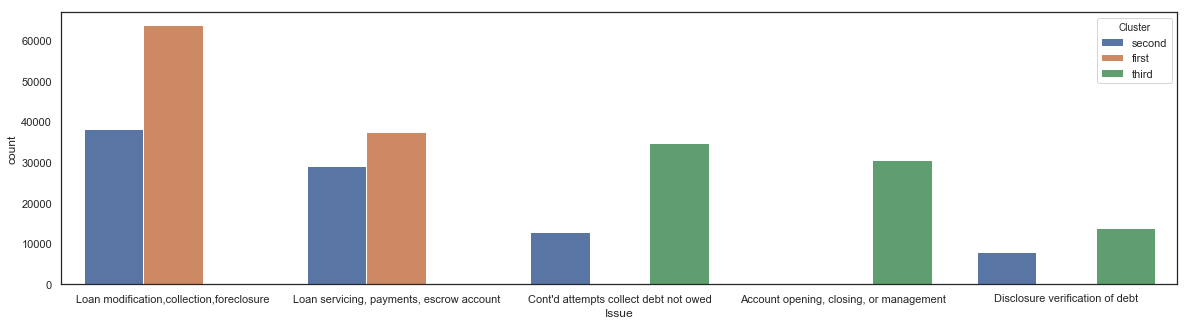

In [48]:
plt.subplots(figsize = (20,5))
sns.countplot(x=customer_df_pca_kmeans['Issue'],order=customer_df_pca_kmeans['Issue'].value_counts()[:5].index,hue=customer_df_pca_kmeans['Cluster'])
plt.show()

### Top 5 Sub-Products segregated per cluster

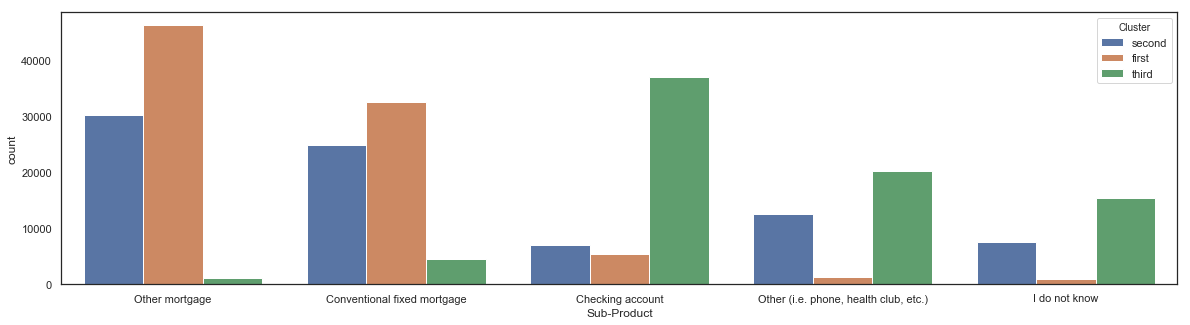

In [49]:
plt.subplots(figsize = (20,5))
sns.countplot(x=customer_df_pca_kmeans['Sub-Product'],order=customer_df_pca_kmeans['Sub-Product'].value_counts()[:5].index,hue=customer_df_pca_kmeans['Cluster'])
plt.show()

### Top 5 Companies segregated per cluster

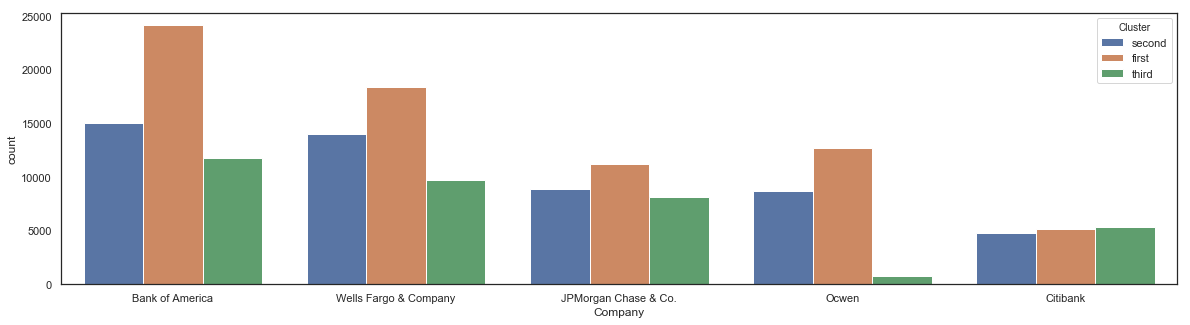

In [50]:
plt.subplots(figsize = (20,5))
sns.countplot(x=customer_df_pca_kmeans['Company'],order=customer_df_pca_kmeans['Company'].value_counts()[:5].index,hue=customer_df_pca_kmeans['Cluster'])
plt.show()

#### From the Above charts we can clearly see Companies have some relationship with same type of compaints clusters like 
1. Bank Of America - maximum complaints in cluster 1 and rest in cluster 0 and 2 which are internally related to the complaints like Loan Service and Loan Modification.
2. Wells Fargo & Company - have max complaints in cluster 1 and rest in 0 and 2 which are internally related to the complaints like Debts and Account opening.
3. JPMorgan Chase - have max complaints in cluster 1 and few in cluster 1, cluster 2 which are internally related to the complaints like Account Opening and Cont'd attempts collect debt and Loans.
4. Ocwen - have max complaints in cluster 0 and 1 which are internally related to the complaints like Loan Service and Loan Modification and related to Mortgage products.
5. Ciibank - have evenly distributed complaints in cluster 2, cluster 1 and cluster 0 which are internally related to the complaints like Loan Service and Loan Modification and Disclosure verification of debt


##### Top products - Mortgage and Debt Collection are distributed amongst cluster 0 and 1.

## Another Approach: using K-Modes clustering technique for categorical data

#### Top 5 features selected for clustering

In [28]:
train_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441034 entries, 0 to 670597
Data columns (total 6 columns):
Product         441034 non-null int32
Sub-Product     441034 non-null int32
Issue           441034 non-null int32
Company         441034 non-null int32
State           441034 non-null int32
Complaint Id    441034 non-null int64
dtypes: int32(5), int64(1)
memory usage: 15.1 MB


#### Choosing K by comparing Cost against each K

In [53]:
from sklearn.metrics import silhouette_score

In [ ]:
scalar = StandardScaler()
scaled_train = scalar.fit_transform(train_enc)

In [34]:
cost = []

for num_clusters in list(range(2,6)):
    kmode = KModes(n_clusters=num_clusters, init="Huang", n_init=1, verbose=0)
    kmode.fit_predict(train_enc)
    cost.append(kmode.cost_)

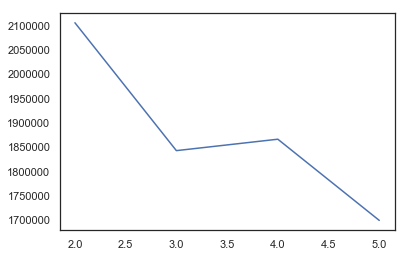

In [35]:
y_bar = np.array([i for i in range(2,6,1)])
plt.plot(y_bar, cost)
# RANDOM

### Clearly we can see that the Elbow method show that the K value is 3 in the graph, so we select K=3 for our KModes algorithm

#### Silhouette Coefficient measures how similar an object is to it's own cluster(cohesion) compared to other clusters (separation) It's value ranges from -1 to 1. A value close to 1 indicates that the object is well matched to its cluster and poorly matched to neighbouring clusters. If most of the objects have high Sil Coefficient, clusters are formed correctly. If more negative valued points are present, there is some issue in the clustering configuration

In [91]:
silhouette_coefficients = []

for num_clusters in range(2, 5):
    kmodes_score = KModes(n_clusters=num_clusters, init = "Huang", n_init = 1, verbose=1)
    kmodes_score.fit(scaled_train)
    silhouette_avg = silhouette_score(scaled_train, kmodes_score.labels_)
    print(f"For n_clusters = {num_clusters}, The average silhouette_score is : {silhouette_avg}")
    silhouette_coefficients.append(silhouette_avg)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 18549, cost: 1931500.0
For n_clusters = 2, The average silhouette_score is : 0.08380309206776261
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1405, cost: 2026378.0
For n_clusters = 3, The average silhouette_score is : 0.12128887593549928
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 164098, cost: 1698894.0
Run 1, iteration: 2/100, moves: 15121, cost: 1698894.0


KeyboardInterrupt: 

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 5), silhouette_coefficients)
plt.xticks(range(2, 5))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

###### For n_clusters = 3, The average silhouette_score is : 0.12128887593549928

### Using K-Mode with "Huang" initialization for K=3

In [36]:
km_rand = KModes(n_clusters=3, init="Huang", n_init=5, verbose=0)
fitClusters_rand = km_rand.fit_predict(train_enc)

In [37]:
train_decoded = labeled_df.apply(lambda x: encoder_dict[x.name].inverse_transform(x))

In [38]:
train_decoded = train_decoded.reset_index()
clustersDf = pd.DataFrame(fitClusters_rand)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([train_decoded, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [39]:
combinedDf.head()

,Product,Sub-Product,Issue,Company,State,Submitted Via,Company Response To Consumer,Timely Response?,Consumer Disputed?,Complaint Id,cluster_predicted
0,Consumer Loan,Vehicle loan,Managing the loan or lease,Wells Fargo & Company,VA,Phone,Closed with explanation,Yes,No,468882,2
1,Bank account or service,Checking account,Using a debit or ATM card,Wells Fargo & Company,CA,Web,Closed with explanation,Yes,No,468889,2
2,Bank account or service,Checking account,"Account opening, closing, or management",Santander Bank US,NY,Fax,Closed,Yes,No,468879,2
3,Bank account or service,Checking account,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,No,468949,2
4,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",Franklin Credit Management,CT,Web,Closed with explanation,Yes,No,475823,1


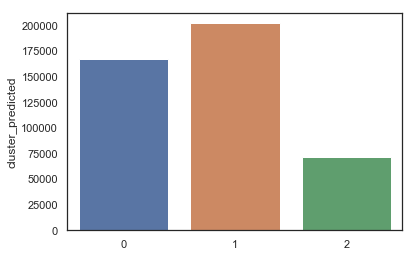

In [40]:
# Checking the count per cluster
cluster_df = pd.DataFrame(combinedDf['cluster_predicted'].value_counts())
sns.barplot(x=cluster_df.index, y=cluster_df['cluster_predicted'])

In [41]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]

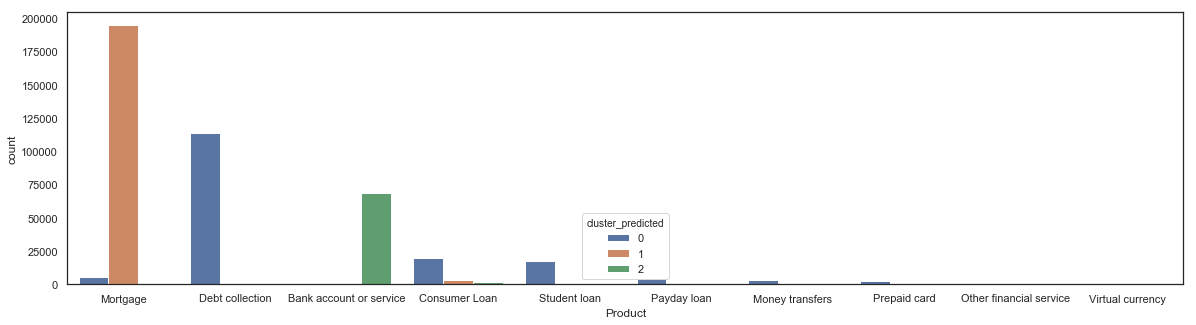

In [42]:
plt.subplots(figsize = (20,5))
sns.countplot(x=combinedDf['Product'],order=combinedDf['Product'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

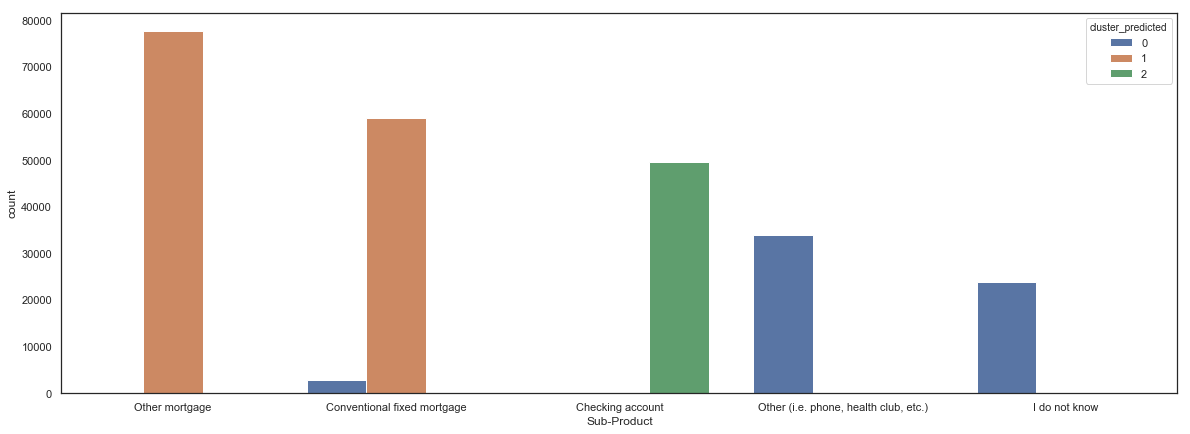

In [43]:
plt.subplots(figsize = (20,7))
sns.countplot(x=combinedDf['Sub-Product'],order=combinedDf['Sub-Product'].value_counts()[:5].index,hue=combinedDf['cluster_predicted'])
plt.show()

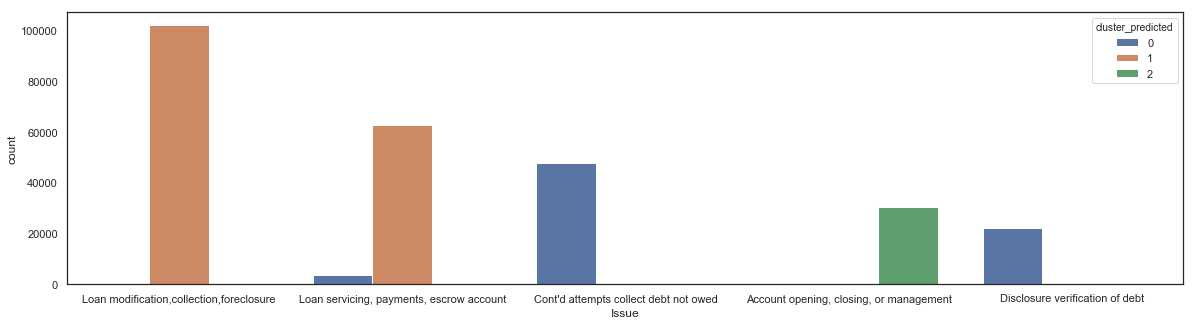

In [44]:
plt.subplots(figsize = (20,5))
sns.countplot(x=combinedDf['Issue'],order=combinedDf['Issue'].value_counts()[:5].index,hue=combinedDf['cluster_predicted'])
plt.show()

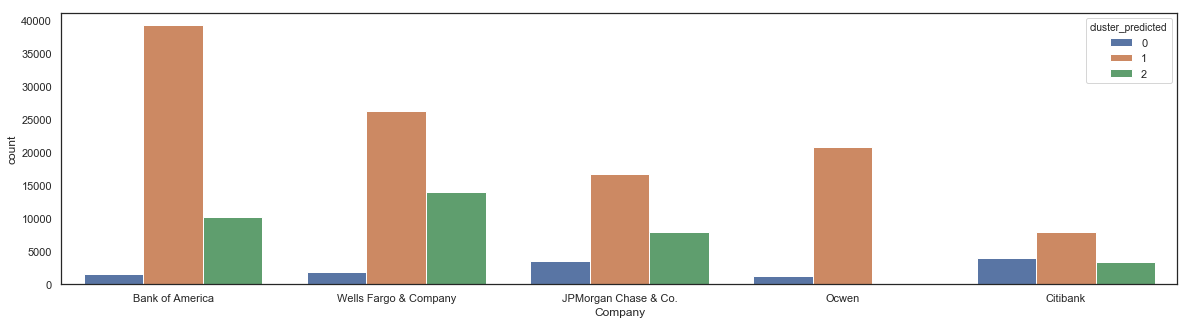

In [45]:
plt.subplots(figsize = (20,5))
sns.countplot(x=combinedDf['Company'],order=combinedDf['Company'].value_counts()[:5].index,hue=combinedDf['cluster_predicted'])
plt.show()

#### From the Above charts we can clearly see Companies have some relationship with same type of compaints clusters like 
1. Bank Of America - maximum complaints in cluster 1 and few cluster 2 which are internally related to the complaints like Loan Service and Loan Modification 
2. Wells Fargo & Company - have max complaints in cluster 1 and 2 which are internally related to the complaints like Loan Modification and Account opening
3. JPMorgan Chase - have max complaints in cluster 1, cluster 2 and few in cluster 0 which are internally related to the complaints like Account Opening and Cont'd attempts collect debt and Loans
4. Ocwen - have max complaints in cluster 1 which are internally related to the complaints like Loan Service and Loan Modification 
5. Ciibank - have averaged complaints in cluster 0 and cluster 2 and most in cluster 1 which are internally related to the complaints like Loan Service and Loan Modification and Disclosure verification of debt


##### Most of them are related to Mortgage and Debt Collection products

In [46]:
combinedDf.head()

,Product,Sub-Product,Issue,Company,State,Submitted Via,Company Response To Consumer,Timely Response?,Consumer Disputed?,Complaint Id,cluster_predicted
0,Consumer Loan,Vehicle loan,Managing the loan or lease,Wells Fargo & Company,VA,Phone,Closed with explanation,Yes,No,468882,2
1,Bank account or service,Checking account,Using a debit or ATM card,Wells Fargo & Company,CA,Web,Closed with explanation,Yes,No,468889,2
2,Bank account or service,Checking account,"Account opening, closing, or management",Santander Bank US,NY,Fax,Closed,Yes,No,468879,2
3,Bank account or service,Checking account,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,No,468949,2
4,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",Franklin Credit Management,CT,Web,Closed with explanation,Yes,No,475823,1


### Ways of Improvements
1. We can use K- Medoid instead of K-Means to reduce the effect of outliers.
2. We can use Feature Weightage using domain knowledge to improve the clustering. We have used this.
3. There are so many missing data in the input. We have eliminated 2 products with more missing values. The model can be improved by getting better data.
4. Principal Component Analysis can be used to identify the most important features of the dataset. We have used this as well in our model